**Boston House Price Prediction Model**

https://www.kaggle.com/vikrishnan/boston-house-prices

In [31]:
#Load our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#model evaluation metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
#We want our plots appear inside our notebook
%matplotlib inline

## 1.Problem Definition
Given a set of a house features can we be able to predict it's price.

In [32]:
#Load our data
data=pd.read_csv("housing.csv")

In [33]:
#summary of our data
data.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [34]:
#column names for house features
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#assigning columns names to our data
data=pd.read_csv("housing.csv",header=None,delimiter=r"\s+", names=column_names)

## 2. Data Exploration

In [35]:
#check the data types in our data
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [36]:
#getting the shape our data in rows and columns
data.shape

(506, 14)

In [37]:
#loading the first 5 rows from our data to get it's summary
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [38]:
#loading the last 5 rows from our data to get it's summary
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [39]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [40]:
#get the summary description of our data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# target variable
we want to predict the house price with a column label  "MEDV" which is the Median value of owner-occupied homes in $1000's

## 3. Data Visualization

<AxesSubplot:>

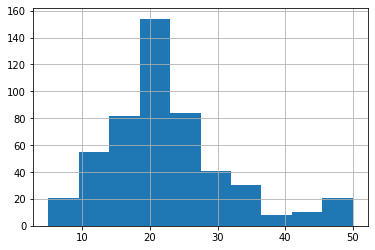

In [41]:
data.MEDV.hist()

C:\Users\Zakar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


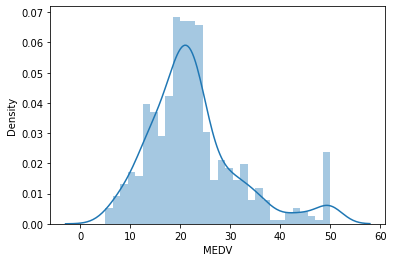

In [42]:
sns.distplot(data['MEDV'], bins=30)
plt.show()

* On average the distribution of the house prices are between 10 and 50 dollars.
* There those on the extreme house prices at dollars over 50.

C:\Users\Zakar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


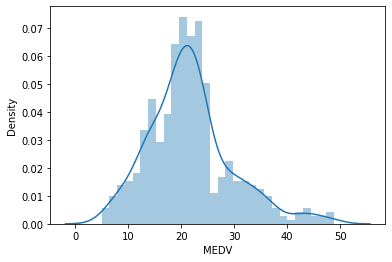

In [43]:
#Let's drop housing prices over or equal to 50 from our data
data=data[~(data["MEDV"]>=50)]
sns.distplot(data['MEDV'], bins=30)
plt.show()

#### 3.2 House Price vs CRIME Rate by town

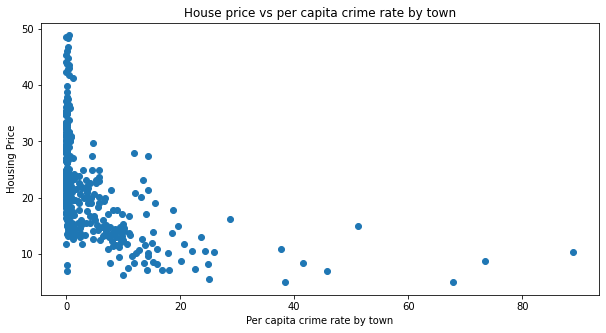

In [44]:
plt.figure(figsize=(10, 5))

plt.scatter(data.CRIM,data.MEDV)
plt.xlabel("Per capita crime rate by town")
plt.ylabel("Housing Price")
plt.title("House price vs per capita crime rate by town");

From the plot above shows the lesser the per capita crime rate by town the more the house prices fall betwween $12-40"safe neighbour hood the expensive the house".
Which implies the higher the crime rate by town the cheaper houses to find.

#### 3.3 Housing prices vs average number of rooms per dwelling

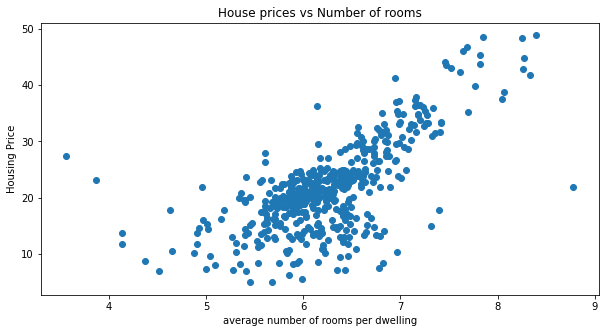

In [45]:
plt.figure(figsize=(10,5))

plt.scatter(data.RM,data.MEDV)
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("House prices vs Number of rooms");

From our dataset most house prices at between 20-30,have an average of 6-7 rooms with some few(outliers) exceptional ones at 50$.

The more the number of rooms above 7 in a house the higher the price ranging between above $30 -50.

#### 3.4 Housing Prices vs 5 Boston employment centres

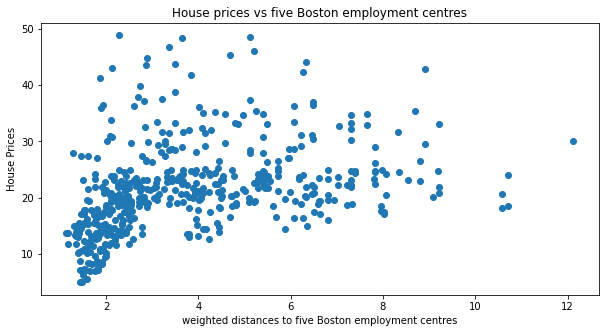

In [46]:
plt.figure(figsize=(10,5))
plt.scatter(data.DIS,data.MEDV)
plt.xlabel("weighted distances to five Boston employment centres")
plt.ylabel("House Prices")
plt.title("House prices vs five Boston employment centres");

The house prices around $5-30 fall between 1-6 weighted distances to the 5 Boston employment centers.

The nearer the house to the employment center the likely the price to be cheaper.

#### 3.5  Housing pricing vs to Age of the house

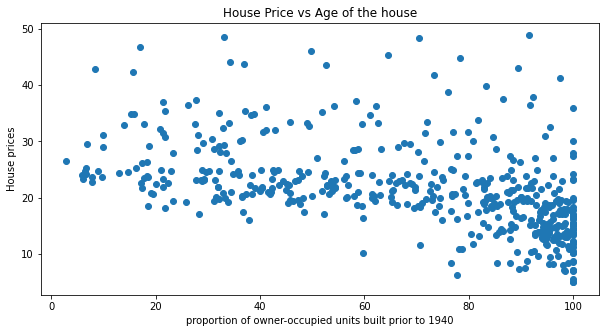

In [47]:
plt.figure(figsize=(10,5))
plt.scatter(data.AGE,data.MEDV)
plt.xlabel("proportion of owner-occupied units built prior to 1940")
plt.ylabel("House prices")
plt.title("House Price vs Age of the house");

The older the Age proportion of owner-occupied units built prior to 1940 the cheaper it is price ranging between $10-20.

Most of the proportion of owner-occupied units built prior to 1940 range between 80-100.

#### 3.6 House prices vs pupil-teacher ratio by town.

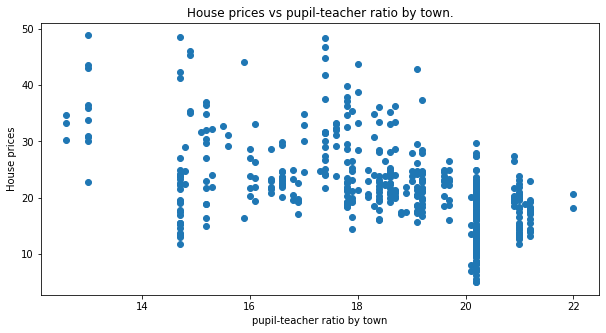

In [48]:
plt.figure(figsize=(10,5))
plt.scatter(data.PTRATIO ,data.MEDV)
plt.xlabel("pupil-teacher ratio by town")
plt.ylabel("House prices")
plt.title("House prices vs pupil-teacher ratio by town.");

Houses where the pupil-teacher ration by town is high the majority of the house prices range between $5-25.

These can be understood as the few pupils to teacher ration the higher the prices of houses in that town (A narrative of public vs private schools) on impact of nearby houses.

## 4. Model Builing


In [49]:
#Difine our feature varibles and target variable
X=data.drop("MEDV",axis=1)
y=data["MEDV"]

In [50]:
#splitting our data into training and test
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

####  4.1 Linear Regression

In [51]:
#instantiate our model
lin_reg=LinearRegression()

#fit training data into our model
lin_reg.fit(X_train,y_train)

#use our model to predict with test data
l_preds=lin_reg.predict(X_test)

#evaluate our model's performance using mean squared error
mse=mean_squared_error(y_test,l_preds)

#evaluate our model's performance using mean absolute error
mae=mean_absolute_error(y_test,l_preds)

#evaluate our model's performance using r2_score
R2_score=r2_score(y_test,l_preds)

print("Linear Regresssion")
print("Mean Squared Error :",mse)
print("mean Absolute Error :",mae)
print("R2 Score :",R2_score)

Linear Regresssion
Mean Squared Error : 12.055902866387564
mean Absolute Error : 2.6415049059591507
R2 Score : 0.7640047258028567
